# Simple neural network for a function in PyTorch

See the [PyTorch website](https://pytorch.org/) for tutorials and other documentation. 
In this notebook we'll rely on ChatGPT 4 to generate code for a PyTorch neural network for a function of a single variable.
Besides the questions to ChatGPT, all code and documentation was provided by ChatGPT.

## Installation of PyTorch

To install PyTorch via Anaconda, use the following conda command:

`conda install pytorch torchvision -c pytorch`


### Verification of PyTorch installation (suggested in PyTorch website)

In [22]:
import torch
x = torch.rand(5, 3)
print(x)

tensor([[0.1244, 0.4890, 0.4055],
        [0.6843, 0.5441, 0.6581],
        [0.7918, 0.0862, 0.6636],
        [0.6087, 0.9290, 0.5669],
        [0.6013, 0.3681, 0.0836]])


Result should be similar to (but not the same; these are random numbers!):

    tensor([[0.3380, 0.3845, 0.3217],
            [0.8337, 0.9050, 0.2650],
            [0.2979, 0.7141, 0.9069],
            [0.1449, 0.1132, 0.1375],
            [0.4675, 0.3947, 0.1426]])

## Telling ChatGPT 4 to make a network for a function of one variable

**To ChatGPT:** *Write a neural network in PyTorch to learn a function of one variable. It should have three hidden layers, each with a width of 10 neutrons.*

To create a neural network in PyTorch with the specifications you described, we'll first need to import the necessary modules from PyTorch, particularly torch and torch.nn. The network will consist of three hidden layers, each with 10 neurons, and since it's for learning a function of one variable, the input and output layers will each have one neuron.

Here’s how you can define such a network using PyTorch:

In [8]:
import torch
import torch.nn as nn

# Define the neural network class inheriting from nn.Module
class OneVariableNet(nn.Module):
    def __init__(self):
        super(OneVariableNet, self).__init__()
        # Define the first hidden layer (input layer to first hidden layer)
        self.hidden1 = nn.Linear(1, 10)  # 1 input, 10 outputs
        # Define the second hidden layer
        self.hidden2 = nn.Linear(10, 10) # 10 inputs, 10 outputs
        # Define the third hidden layer
        self.hidden3 = nn.Linear(10, 10) # 10 inputs, 10 outputs
        # Define the output layer
        self.output = nn.Linear(10, 1)   # 10 inputs, 1 output

        # Define activation function, you can use others like ReLU or LeakyReLU
        self.activation = nn.Tanh()

    def forward(self, x):
        # Forward pass through each layer
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.activation(self.hidden3(x))
        x = self.output(x)
        return x

# Create an instance of the network
net = OneVariableNet()

# Print the network structure
print(net)


OneVariableNet(
  (hidden1): Linear(in_features=1, out_features=10, bias=True)
  (hidden2): Linear(in_features=10, out_features=10, bias=True)
  (hidden3): Linear(in_features=10, out_features=10, bias=True)
  (output): Linear(in_features=10, out_features=1, bias=True)
  (activation): Tanh()
)


**Explanation:**
1. **Network Structure:** This network begins with an input layer that accepts a single feature (since it's a function of one variable). It then passes through three hidden layers, each with 10 neurons, and finally outputs a single value, which is typical for regression tasks.

1. **Activation Function:** I used the Tanh activation function for the hidden layers, which helps introduce non-linearity to the model, allowing it to learn more complex patterns. You can substitute this with other functions like ReLU if preferred, which might offer benefits in terms of training speed and avoiding vanishing gradients in some cases.

1. **Output Layer:** The final output layer does not use an activation function since we're presumably predicting a continuous variable (regression task). If you're working on a classification task, you might need a suitable activation function like sigmoid or softmax for binary or multi-class classification, respectively.

1. **Initialization and Usage:** After defining the network, you can create an instance and use it for training or inference as needed. Training this network would involve defining a loss function and an optimizer, then running a training loop to fit the model to your data.

This setup should work well for basic experiments and learning purposes. If you want to train this model on actual data, you’ll need to set up a training loop with loss computation and optimization steps.

## Now ask ChatGPT to use this code to learn a specified function in a specified region

**To ChatGPT:** *Write code to use this code to learn the function `f(x) = sin(x)**2` from x = 0 to x = 2, with 20 randomly spaced training points. Then test it with 50 equally spaced testing points.*

To accomplish the task of training a neural network on the function `f(x) = sin(x)**2` and testing it on new data points, we'll follow these steps:

1. Data Preparation: Generate training data and testing data as specified.
1. Network Training: Implement the training loop using a suitable optimizer and loss function.
1. Testing: Evaluate the network on the testing data and possibly visualize the results.

First, we'll need to define our dataset. We'll generate 20 random training points in the range [0, 2] and 50 equally spaced testing points in the same range.

Here's the complete code to do this, including both training and testing phases:

Epoch [100/2000], Loss: 3.7249e-03
Epoch [200/2000], Loss: 3.1713e-03
Epoch [300/2000], Loss: 1.9605e-03
Epoch [400/2000], Loss: 4.3974e-04
Epoch [500/2000], Loss: 3.3119e-04
Epoch [600/2000], Loss: 2.3859e-04
Epoch [700/2000], Loss: 1.5577e-04
Epoch [800/2000], Loss: 8.8906e-05
Epoch [900/2000], Loss: 4.5247e-05
Epoch [1000/2000], Loss: 2.3916e-05
Epoch [1100/2000], Loss: 1.5100e-05
Epoch [1200/2000], Loss: 1.0658e-05
Epoch [1300/2000], Loss: 7.7128e-06
Epoch [1400/2000], Loss: 5.6269e-06
Epoch [1500/2000], Loss: 4.1907e-06
Epoch [1600/2000], Loss: 3.2489e-06
Epoch [1700/2000], Loss: 2.6639e-06
Epoch [1800/2000], Loss: 2.3192e-06
Epoch [1900/2000], Loss: 2.1242e-06
Epoch [2000/2000], Loss: 2.0152e-06


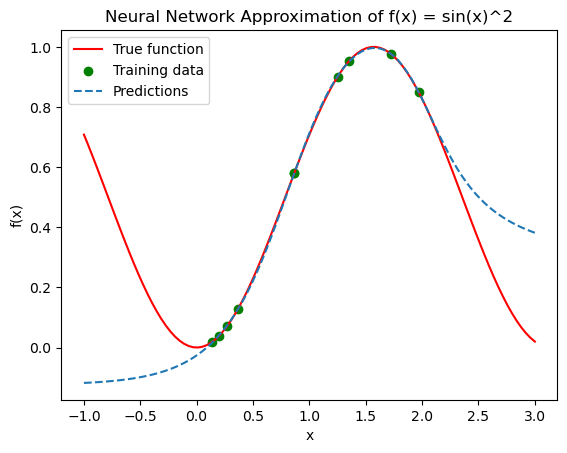

In [17]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class OneVariableNet(nn.Module):
    def __init__(self):
        super(OneVariableNet, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.hidden3 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.activation = nn.Tanh()

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.activation(self.hidden3(x))
        x = self.output(x)
        return x

# Create an instance of the network
net = OneVariableNet()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Generate training data
x_train = 2 * torch.rand(10, 1)  # Randomly spaced points
y_train = torch.sin(x_train)**2  # f(x) = sin(x)^2

# Training loop
epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4e}')

# Generate testing data
x_test = torch.linspace(-1, 3, 100).unsqueeze(1)  # Equally spaced points
y_test = torch.sin(x_test)**2  # f(x) = sin(x)^2
with torch.no_grad():
    predictions = net(x_test)

# Plot the results
plt.plot(x_test.numpy(), y_test.numpy(), label='True function', color='r')
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training data', color='g')
plt.plot(x_test.numpy(), predictions.numpy(), label='Predictions', linestyle='--')
plt.legend()
plt.title('Neural Network Approximation of f(x) = sin(x)^2')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


**Explanation:**
* **Network Setup:** The neural network is set up as defined previously.
* **Data Generation:** Random training data is generated within the specified range and the function values are computed as `sin(x)**2` 
* **Training Process:** The network is trained using the Adam optimizer and mean squared error (MSE) loss function over 2000 epochs. Adjustments can be made to the learning rate or number of epochs based on how the loss progresses.
* **Testing and Visualization:** The network's predictions are generated for the testing dataset and plotted against the true function values. The training data is also plotted to show how well the network learned to approximate the function within the training range.

This code should provide a clear demonstration of how well the neural network can learn and generalize the function `f(x) = sin(x)**2`.


**To ChatGPT:** *What is the same code with a ReLu activation function?*

To modify the previously described neural network so that it uses the ReLU (Rectified Linear Unit) activation function instead of the Tanh activation function, you simply need to replace the Tanh activation instances with ReLU in the network definition. ReLU is often preferred in deep networks due to its simplicity and effectiveness at avoiding vanishing gradient issues.

Here's how you can update the code to use ReLU:

Epoch [100/2000], Loss: 6.2734e-03
Epoch [200/2000], Loss: 2.4208e-03
Epoch [300/2000], Loss: 8.8777e-04
Epoch [400/2000], Loss: 1.9188e-04
Epoch [500/2000], Loss: 7.6298e-05
Epoch [600/2000], Loss: 7.0848e-05
Epoch [700/2000], Loss: 7.0763e-05
Epoch [800/2000], Loss: 7.0753e-05
Epoch [900/2000], Loss: 7.0743e-05
Epoch [1000/2000], Loss: 7.0732e-05
Epoch [1100/2000], Loss: 7.0721e-05
Epoch [1200/2000], Loss: 7.0709e-05
Epoch [1300/2000], Loss: 7.0697e-05
Epoch [1400/2000], Loss: 7.0684e-05
Epoch [1500/2000], Loss: 7.0671e-05
Epoch [1600/2000], Loss: 7.0658e-05
Epoch [1700/2000], Loss: 7.0643e-05
Epoch [1800/2000], Loss: 7.0629e-05
Epoch [1900/2000], Loss: 7.0614e-05
Epoch [2000/2000], Loss: 7.0600e-05


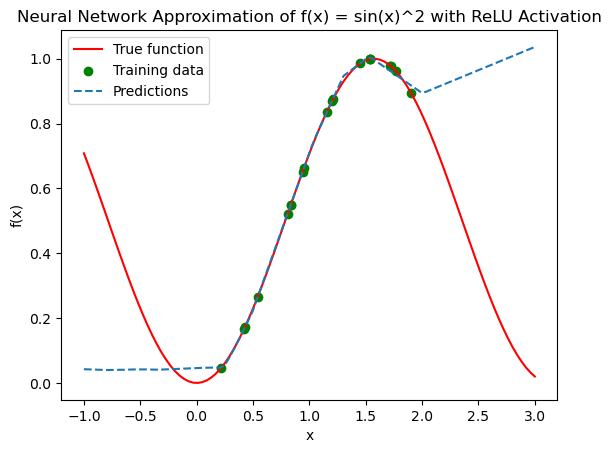

In [20]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

class OneVariableNet(nn.Module):
    def __init__(self):
        super(OneVariableNet, self).__init__()
        self.hidden1 = nn.Linear(1, 10)
        self.hidden2 = nn.Linear(10, 10)
        self.hidden3 = nn.Linear(10, 10)
        self.output = nn.Linear(10, 1)
        self.activation = nn.ReLU()  # Changed from nn.Tanh() to nn.ReLU()

    def forward(self, x):
        x = self.activation(self.hidden1(x))
        x = self.activation(self.hidden2(x))
        x = self.activation(self.hidden3(x))
        x = self.output(x)
        return x

# Create an instance of the network
net = OneVariableNet()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Generate training data
x_train = 2 * torch.rand(20, 1)  # Randomly spaced points
y_train = torch.sin(x_train)**2  # f(x) = sin(x)^2

# Training loop
epochs = 2000
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = net(x_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if (epoch + 1) % 100 == 0:
        print(f'Epoch [{epoch + 1}/{epochs}], Loss: {loss.item():.4e}')

# Generate testing data
x_test = torch.linspace(-1, 3, 100).unsqueeze(1)  # Equally spaced points
#x_test = torch.linspace(0, 2, 50).unsqueeze(1)  # Equally spaced points
y_test = torch.sin(x_test)**2  # f(x) = sin(x)^2
with torch.no_grad():
    predictions = net(x_test)

# Plot the results
plt.plot(x_test.numpy(), y_test.numpy(), label='True function', color='r')
plt.scatter(x_train.numpy(), y_train.numpy(), label='Training data', color='g')
plt.plot(x_test.numpy(), predictions.numpy(), label='Predictions', linestyle='--')
plt.legend()
plt.title('Neural Network Approximation of f(x) = sin(x)^2 with ReLU Activation')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.show()


**Changes and Considerations:**
* **Activation Function:** We replaced `nn.Tanh()` with `nn.ReLU()`. ReLU activation function might result in different learning characteristics, particularly in how the network fits non-linear functions like `sin(x)**2`.
ReLU provides linear responses for positive values and zero for negative values, which might affect how well it models the curve compared to Tanh.
* Learning Characteristics: Networks with ReLU activation might learn faster in some cases due to simpler gradient computations. However, in cases where the function involves negative inputs or outputs that need modeling around zero, Tanh might capture dynamics better because of its symmetric behavior around zero.

This updated code uses ReLU, and you might observe different results in how the model learns and generalizes the function `f(x) = sin(x)**2`. 
Experimenting with different activation functions can provide insights into their impact on model performance and behavior.

## More information from ChatGPT

**To ChatGPT:** *What algorithm is being used for backpropagation?*

In the provided code, the algorithm being used for backpropagation is not explicitly specified because it's inherently handled by PyTorch's automatic differentiation engine, which is built into the `backward()` function. However, the optimization algorithm that leverages this backpropagation to update the weights is Adam (Adaptive Moment Estimation).

Here's a breakdown of the key components:

**Automatic Differentiation**
* **Automatic Differentiation:** PyTorch uses a mechanism known as automatic differentiation to compute gradients. This is performed by the `backward()` method on the final loss tensor. This method calculates the gradients of the loss with respect to all tensors that have `requires_grad=True`. These tensors typically represent the weights and biases of the model.
* **Backpropagation:** Under the hood, when you call `loss.backward()`, PyTorch computes the gradient of the loss with respect to all parameters (weights) in the network by tracing back from the loss through the computational graph. Each operation in the graph has a predefined way of calculating gradients in a backward pass, effectively implementing the chain rule. This process is a practical implementation of the backpropagation algorithm.

**Optimization Algorithm**
* **Adam Optimizer:** The optimizer used here, `optim.Adam`, is an algorithm for first-order gradient-based optimization of stochastic objective functions, based on adaptive estimates of lower-order moments. Adam combines the advantages of two other extensions of stochastic gradient descent, specifically:
    * Adaptive Gradient Algorithm (AdaGrad) that maintains a per-parameter learning rate that improves performance on problems with sparse gradients (like natural language and computer vision problems).
    * Root Mean Square Propagation (RMSProp) that also maintains per-parameter learning rates that are adapted based on the average of recent magnitudes of the gradients for the weight (this means it works well on online and non-stationary problems).

**Why Adam?**
* **Efficiency:** Adam is computationally efficient and has little memory requirement.
* **Adaptive Learning Rate:** It handles sparse gradients on noisy problems very well.
* **Suitability for Problems:** Adam is generally well suited for problems that are large in terms of data and/or parameters.
* **Hyperparameters:** It has few hyperparameters that require tuning (like the learning rate, the exponential decay rates for the moment estimates).
  
In essence, while the backpropagation algorithm is the method used to compute the gradients, Adam is the algorithm that uses these gradients to update the weights iteratively in order to minimize the loss function.